In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

loading data

In [2]:
df=pd.read_csv("mcl.csv")

In [3]:
#import tkinter as tk
#from tkinter import filedialog
#import pandas as pd

#root= tk.Tk()

#canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
#canvas1.pack()

#def getCSV ():
#    global df
    
    #import_file_path = filedialog.askopenfilename()
   # df = pd.read_csv (import_file_path)
   # print (df)
    
#browseButton_CSV = tk.Button(text="      Import CSV File     ", command=getCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
#canvas1.create_window(150, 150, window=browseButton_CSV)

#root.mainloop()

In [4]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

INFOMARTION OF DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

DESCRIBE OF DATA

In [7]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


DIVIDED INTO THE DTYPE

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle', 'pdate']}

In [9]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [10]:
#duplicate = df.duplicated()
#print(duplicate.sum())
#df[duplicate]

In [11]:
df.shape

(209593, 37)

In [12]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


UNIVARIANT ANALYSIS

In [13]:
df.groupby(['label']).count()

,Unnamed: 0,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
label,,,,,,,,,,,,,,,,,,,,,
0,26162,26162,26162,26162,26162,26162,26162,26162,26162,26162,...,26162,26162,26162,26162,26162,26162,26162,26162,26162,26162
1,183431,183431,183431,183431,183431,183431,183431,183431,183431,183431,...,183431,183431,183431,183431,183431,183431,183431,183431,183431,183431


In [14]:
ft=df.groupby(['label']).size().reset_index(name='count').rename(columns={'lbale':'label'})
ft

,label,count
0,0,26162
1,1,183431


In [15]:
import matplotlib.pyplot as plt
!matplotlib

'matplotlib' is not recognized as an internal or external command,
operable program or batch file.


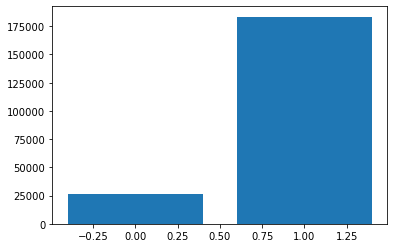

In [16]:
plt.bar(ft['label'],ft['count'])
plt.show()

In [17]:
ft['count'] = ft['count']/sum(ft['count'])*100
ft

,label,count
0,0,12.482287
1,1,87.517713


In [18]:
print(df.nunique())

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [19]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle', 'pdate']}

In [20]:
df.groupby(['last_rech_amt_ma']).size().reset_index(name='count').rename(columns={'last_rech_amt_ma':'last_rech_amt_ma'})


,last_rech_amt_ma,count
0,0,20995
1,173,811
2,177,5
3,769,3
4,770,41766
...,...,...
65,21739,3
66,22609,1
67,32000,32
68,34783,1


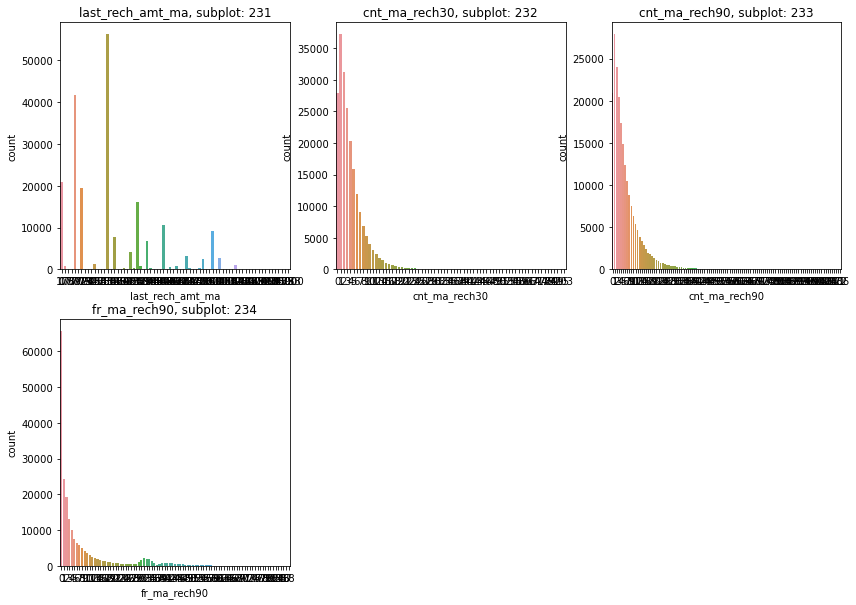

In [21]:
plt.figsize = (10,7)
x = ["last_rech_amt_ma","cnt_ma_rech30","cnt_ma_rech90","fr_ma_rech90"]

#  Categorical Data
#heart_CAT = ['sex', 'cp', 'restecg', 'ca', 'thal']

#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,10))

for i in x:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(df[i])
    c = c + 1

plt.show()

BI VARIATE

numercial numerical

In [22]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle', 'pdate']}

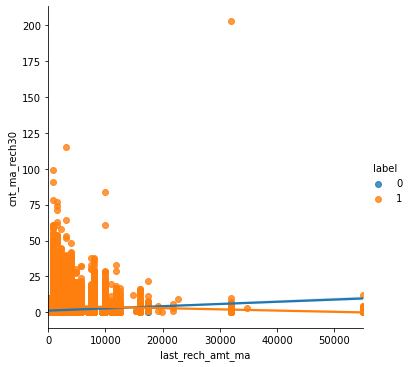

In [23]:
sns.lmplot(x='last_rech_amt_ma',y="cnt_ma_rech30",hue="label",fit_reg=True,data=df)

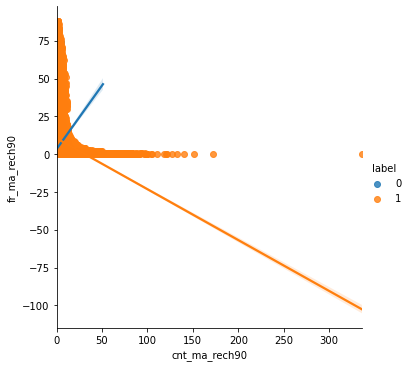

In [24]:
sns.lmplot(x="cnt_ma_rech90",y="fr_ma_rech90",hue='label',fit_reg=True,data=df)

In [25]:
df.corr()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


 Z test value

In [26]:
df_mean = df.groupby(['label']).mean().reset_index()
df_mean

,label,Unnamed: 0,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,104732.412316,8870.998799,1272.376756,1278.817736,2029.914812,2329.486376,3223.694134,3470.381002,1237.045830,...,1.431313,8.873634,271.873754,0.028285,15.703549,9.642382,6.234386,0.027081,2.270777,2.979047
1,1,104806.211873,8004.139590,5967.455497,6767.646423,2787.095360,3647.985363,3831.746662,3746.692974,2182.462408,...,2.948340,19.246834,275.055959,0.057700,18.922749,25.642590,6.769990,0.048787,3.559715,4.512952


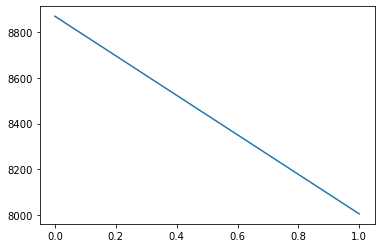

In [27]:
plt.plot(df_mean['label'], df_mean['aon'])

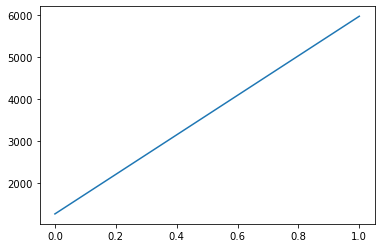

In [28]:
plt.plot(df_mean['label'], df_mean['daily_decr30'])

In [29]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [30]:
df_mean = df.groupby(['label']).mean().reset_index().drop(['Unnamed: 0'], axis=1).add_prefix('mean_')
df_var = df.groupby(['label']).var().reset_index().drop(['Unnamed: 0','label'], axis=1).add_prefix('var_')
df_count = df.groupby(['label']).count().reset_index().drop(['Unnamed: 0','label'], axis=1).add_prefix('count_')
pd.concat([df_mean,df_var,df_count], axis=1)


,mean_label,mean_aon,mean_daily_decr30,mean_daily_decr90,mean_rental30,mean_rental90,mean_last_rech_date_ma,mean_last_rech_date_da,mean_last_rech_amt_ma,mean_cnt_ma_rech30,...,count_maxamnt_loans30,count_medianamnt_loans30,count_cnt_loans90,count_amnt_loans90,count_maxamnt_loans90,count_medianamnt_loans90,count_payback30,count_payback90,count_pcircle,count_pdate
0,0,8870.998799,1272.376756,1278.817736,2029.914812,2329.486376,3223.694134,3470.381002,1237.045830,1.303417,...,26162,26162,26162,26162,26162,26162,26162,26162,26162,26162
1,1,8004.139590,5967.455497,6767.646423,2787.095360,3647.985363,3831.746662,3746.692974,2182.462408,4.359530,...,183431,183431,183431,183431,183431,183431,183431,183431,183431,183431


In [31]:
df_var

,var_aon,var_daily_decr30,var_daily_decr90,var_rental30,var_rental90,var_last_rech_date_ma,var_last_rech_date_da,var_last_rech_amt_ma,var_cnt_ma_rech30,var_fr_ma_rech30,...,var_cnt_loans30,var_amnt_loans30,var_maxamnt_loans30,var_medianamnt_loans30,var_cnt_loans90,var_amnt_loans90,var_maxamnt_loans90,var_medianamnt_loans90,var_payback30,var_payback90
0,6.353348e+09,1.003264e+07,1.012068e+07,1.411071e+07,1.894708e+07,2.442521e+09,2.666428e+09,4.318456e+06,4.084533,2.667069e+09,...,1.210239,52.036858,1.813084e+07,0.023282,47968.615464,80.576665,1.351429,0.022077,98.284041,131.319000
1,5.640917e+09,9.296355e+07,1.310205e+08,1.912758e+07,3.512818e+07,2.971895e+09,2.874899e+09,5.694805e+06,18.949508,2.907680e+09,...,6.996317,324.283569,1.800688e+07,0.050893,50898.724398,757.137787,4.828995,0.042814,74.536543,102.389616


In [32]:
df.groupby(['label']).count()

,Unnamed: 0,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
label,,,,,,,,,,,,,,,,,,,,,
0,26162,26162,26162,26162,26162,26162,26162,26162,26162,26162,...,26162,26162,26162,26162,26162,26162,26162,26162,26162,26162
1,183431,183431,183431,183431,183431,183431,183431,183431,183431,183431,...,183431,183431,183431,183431,183431,183431,183431,183431,183431,183431


In [33]:
df_mean = df.groupby(['label']).mean().reset_index()
df_var = df.groupby(['label']).var().reset_index()
z = (8870.998799 - 8004.139590)/np.sqrt(np.square(6.353348)/26162 + np.square(5.640917)/ 26162)
z

16502.91380940244

In [34]:
#sns.pairplot(df)
#plt.show()

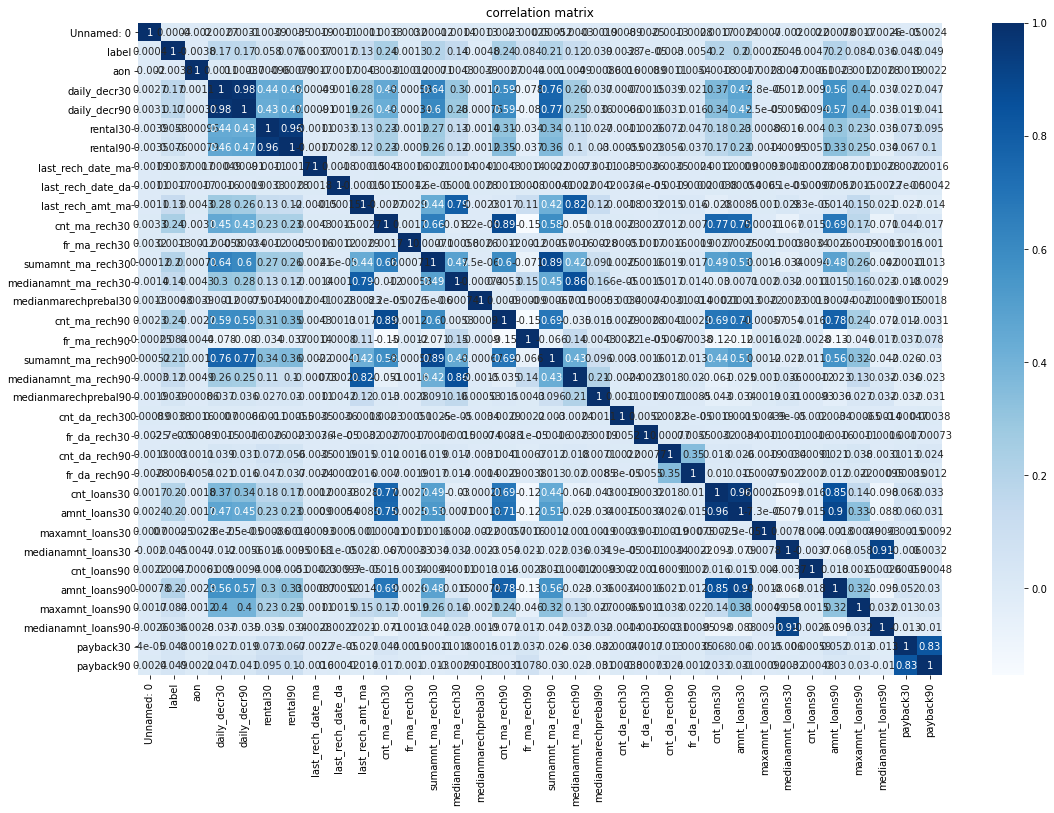

In [35]:
fig=plt.figure(figsize=(18,12))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")
plt.title("correlation matrix")
plt.show()

# Detect Aberrant & Missing value

# Data pre processing 

In [36]:
df.isnull()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209589,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209591,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

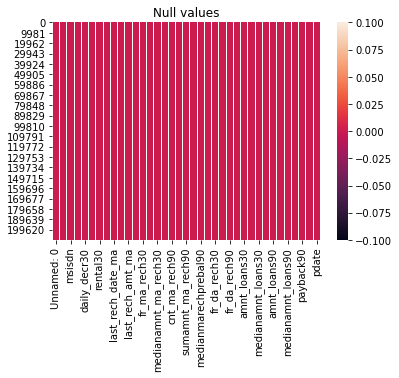

In [38]:
sns.heatmap(df.isnull()) 
plt.title("Null values") 
plt.show()

In [39]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [40]:
df.drop('Unnamed: 0', axis='columns', inplace=True)

#ri.drop('county_name',
#  axis='columns', inplace=True)

In [41]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [42]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,msisdn,pcircle,pdate
0,21408I70789,UPW,2016-07-20
1,76462I70374,UPW,2016-08-10
2,17943I70372,UPW,2016-08-19
3,55773I70781,UPW,2016-06-06
4,03813I82730,UPW,2016-06-22


In [43]:
s=(df.dtypes=="object")
obj_col=list(s[s].index)
print("catagorical varible")
print(obj_col)

catagorical varible
['msisdn', 'pcircle', 'pdate']


LABEL ENCODING

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['msisdn', 'pcircle', 'pdate']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [45]:
df.drop('pcircle', axis='columns', inplace=True)
df.drop('medianamnt_loans30', axis='columns', inplace=True)
df.drop('medianamnt_loans90', axis='columns', inplace=True)


In [46]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pdate
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0,2,12,6.0,2.0,12,6,29.000000,29.000000,49
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0,1,12,12.0,1.0,12,12,0.000000,0.000000,70
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0,1,6,6.0,1.0,6,6,0.000000,0.000000,79
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0,2,12,6.0,2.0,12,6,0.000000,0.000000,5
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0,7,42,6.0,7.0,42,6,2.333333,2.333333,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,0,2,12,6.0,2.0,12,6,1.000000,1.000000,16
209589,1,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,0,3,18,6.0,3.0,18,6,1.000000,1.000000,11
209590,1,53995,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,0,4,42,12.0,6.0,54,12,4.000000,3.833333,58
209591,1,111388,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,0,2,18,12.0,3.0,24,12,0.000000,10.500000,54


In [47]:
df.dtypes

label                     int64
msisdn                    int32
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
payback30               float64
payback9

In [48]:
df.shape

(209593, 33)

label                      AxesSubplot(0.125,0.749828;0.0435393x0.130172)
msisdn                  AxesSubplot(0.177247,0.749828;0.0435393x0.130172)
aon                     AxesSubplot(0.229494,0.749828;0.0435393x0.130172)
daily_decr30            AxesSubplot(0.281742,0.749828;0.0435393x0.130172)
daily_decr90            AxesSubplot(0.333989,0.749828;0.0435393x0.130172)
rental30                AxesSubplot(0.386236,0.749828;0.0435393x0.130172)
rental90                AxesSubplot(0.438483,0.749828;0.0435393x0.130172)
last_rech_date_ma        AxesSubplot(0.49073,0.749828;0.0435393x0.130172)
last_rech_date_da       AxesSubplot(0.542978,0.749828;0.0435393x0.130172)
last_rech_amt_ma        AxesSubplot(0.595225,0.749828;0.0435393x0.130172)
cnt_ma_rech30           AxesSubplot(0.647472,0.749828;0.0435393x0.130172)
fr_ma_rech30            AxesSubplot(0.699719,0.749828;0.0435393x0.130172)
sumamnt_ma_rech30       AxesSubplot(0.751966,0.749828;0.0435393x0.130172)
medianamnt_ma_rech30    AxesSubplot(0.

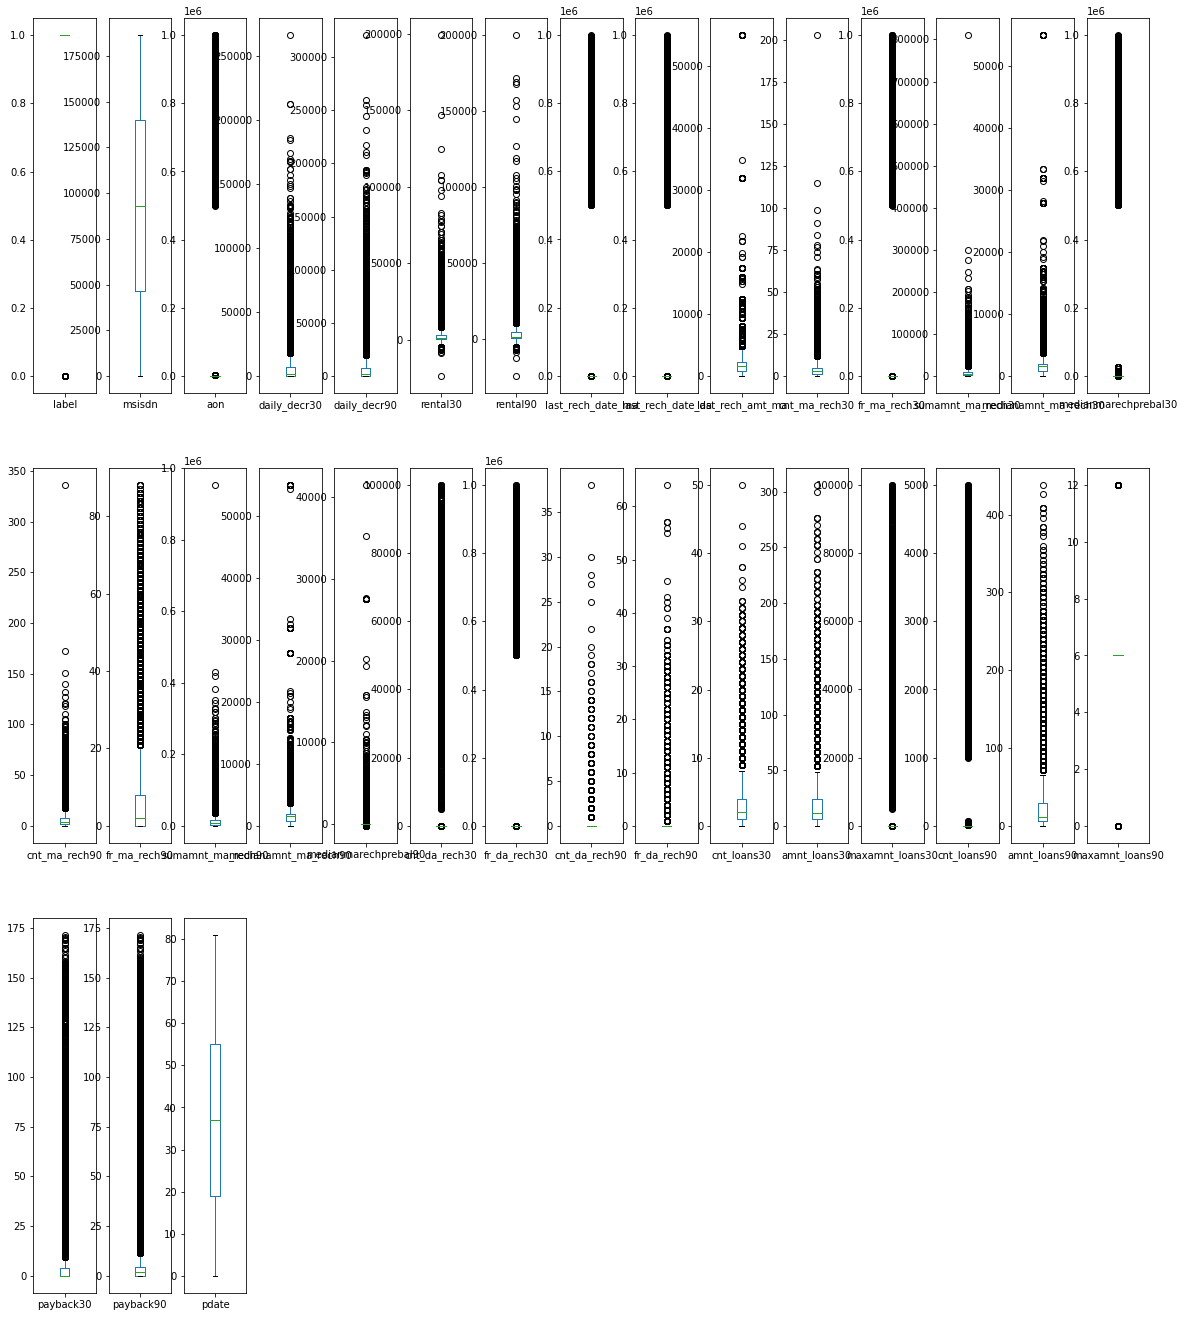

In [49]:
df.plot(kind='box',subplots=True,layout=(5,15),figsize=(20,40))

DETECTING OUTLIERS

In [50]:
from scipy import stats

z = np.abs(stats.zscore(df))
print(z)

[[2.64789583 0.984213   0.10357685 ... 2.9046997  2.39409346 0.52239995]
 [0.37765836 0.91502744 0.09776412 ... 0.38562959 0.41923266 1.47739785]
 [0.37765836 1.10692885 0.10010243 ... 0.38562959 0.41923266 1.88668266]
 ...
 [0.37765836 0.7274342  0.09378769 ... 0.06820893 0.04735622 0.93168476]
 [0.37765836 0.34017702 0.08428915 ... 0.38562959 0.59938541 0.7497804 ]
 [0.37765836 0.52386948 0.08628398 ... 0.38562959 0.41923266 0.06878922]]


In [51]:
threshold = 3
print(np.where(z > 3))

(array([    21,     22,     22, ..., 209580, 209581, 209586], dtype=int64), array([16, 16, 31, ..., 29,  4, 28], dtype=int64))


In [52]:
df_new= df[(z < 3).all(axis=1)]

In [53]:
df_new

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pdate
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0,2,12,6.0,2.0,12,6,29.000000,29.000000,49
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0,1,12,12.0,1.0,12,12,0.000000,0.000000,70
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0,1,6,6.0,1.0,6,6,0.000000,0.000000,79
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0,2,12,6.0,2.0,12,6,0.000000,0.000000,5
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0,7,42,6.0,7.0,42,6,2.333333,2.333333,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,0,2,12,6.0,2.0,12,6,1.000000,1.000000,16
209589,1,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,0,3,18,6.0,3.0,18,6,1.000000,1.000000,11
209590,1,53995,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,0,4,42,12.0,6.0,54,12,4.000000,3.833333,58
209591,1,111388,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,0,2,18,12.0,3.0,24,12,0.000000,10.500000,54


In [54]:
#df_new=df[(z<3).all(axis=1)]

In [55]:
#df_new

label                      AxesSubplot(0.125,0.749828;0.0435393x0.130172)
msisdn                  AxesSubplot(0.177247,0.749828;0.0435393x0.130172)
aon                     AxesSubplot(0.229494,0.749828;0.0435393x0.130172)
daily_decr30            AxesSubplot(0.281742,0.749828;0.0435393x0.130172)
daily_decr90            AxesSubplot(0.333989,0.749828;0.0435393x0.130172)
rental30                AxesSubplot(0.386236,0.749828;0.0435393x0.130172)
rental90                AxesSubplot(0.438483,0.749828;0.0435393x0.130172)
last_rech_date_ma        AxesSubplot(0.49073,0.749828;0.0435393x0.130172)
last_rech_date_da       AxesSubplot(0.542978,0.749828;0.0435393x0.130172)
last_rech_amt_ma        AxesSubplot(0.595225,0.749828;0.0435393x0.130172)
cnt_ma_rech30           AxesSubplot(0.647472,0.749828;0.0435393x0.130172)
fr_ma_rech30            AxesSubplot(0.699719,0.749828;0.0435393x0.130172)
sumamnt_ma_rech30       AxesSubplot(0.751966,0.749828;0.0435393x0.130172)
medianamnt_ma_rech30    AxesSubplot(0.

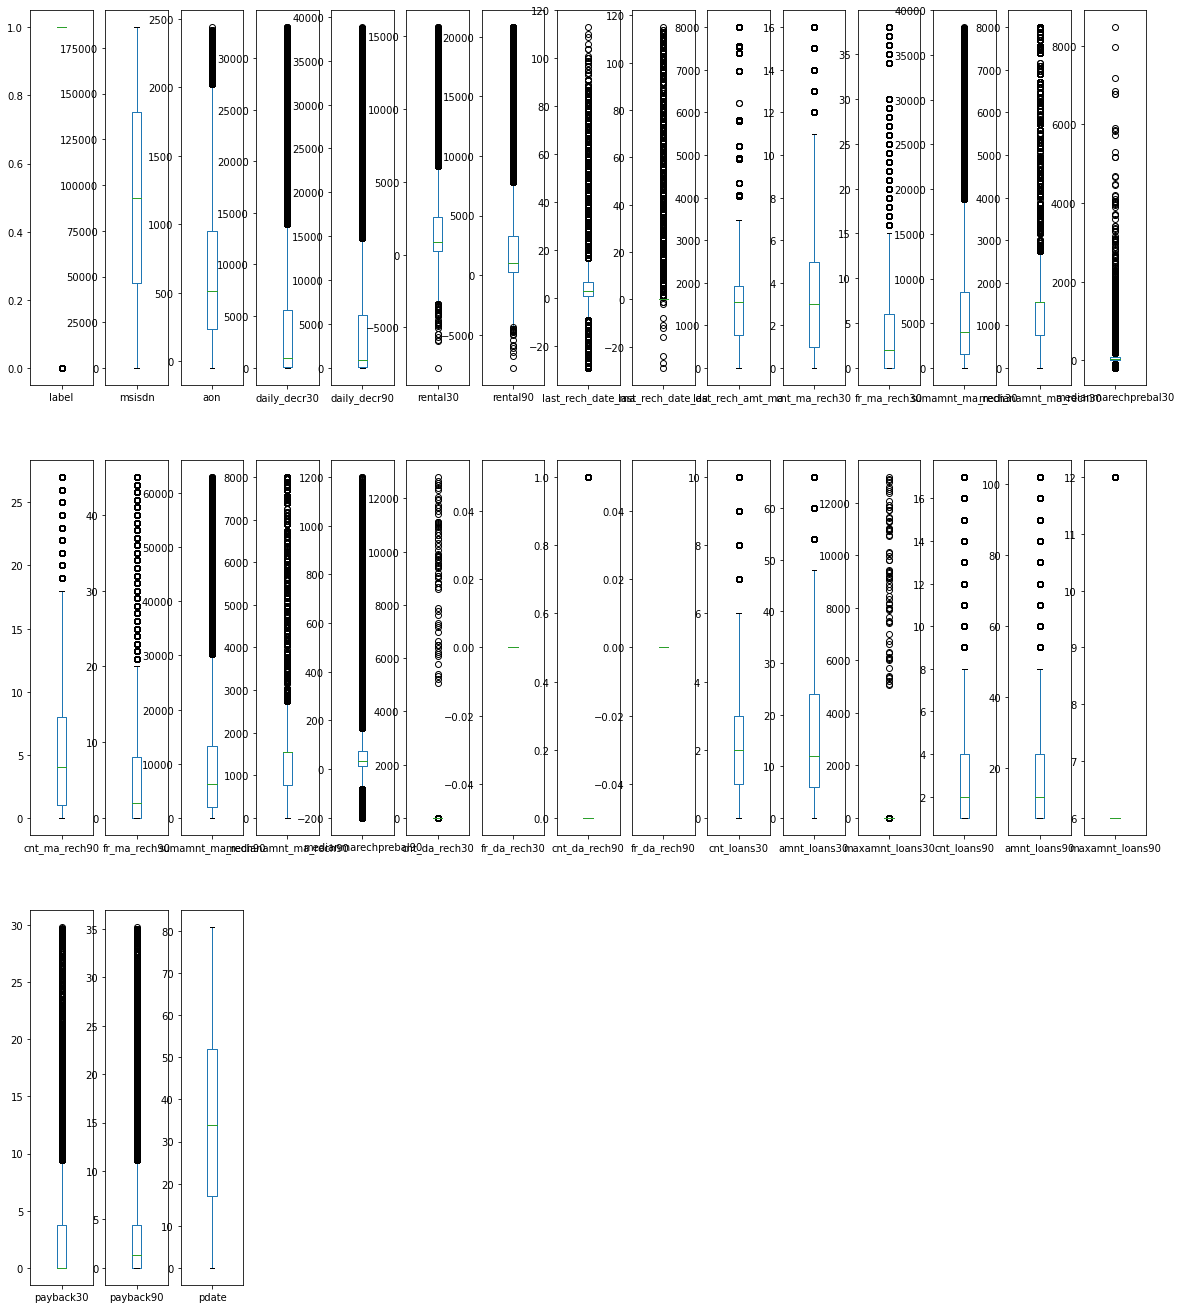

In [56]:
df_new.plot(kind='box',subplots=True,layout=(5,15),figsize=(20,40))

In [57]:
#df_new.shape

In [58]:
#df.shape

In [59]:
ploss=((41725)/209593)*100
ploss

19.907630502927102

In [60]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [61]:
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['msisdn', 'pdate'], int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'cnt_loans90', 'payback30', 'payback90']}

In [62]:
#sns.displot(df)

In [63]:
df.skew(axis = 0, skipna = True)


label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [64]:
df.skew(axis = 1, skipna = True)

0         5.545784
1         5.575830
2         5.641497
3         5.742465
4         3.538548
            ...   
209588    4.845841
209589    5.736168
209590    4.175434
209591    5.282558
209592    5.483673
Length: 209593, dtype: float64

In [65]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pdate
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0,2,12,6.0,2.0,12,6,29.000000,29.000000,49
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0,1,12,12.0,1.0,12,12,0.000000,0.000000,70
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0,1,6,6.0,1.0,6,6,0.000000,0.000000,79
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0,2,12,6.0,2.0,12,6,0.000000,0.000000,5
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0,7,42,6.0,7.0,42,6,2.333333,2.333333,21


SKEW

In [66]:
from scipy.stats import skew

In [67]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'payback30', 'payback90', 'pdate'],
      dtype='object')

In [68]:
#for col in df:
#    print(col)
#    print(skew(df[col]))
    
#    plt.figure()
#    sns.displot(df[col])
#    plt.show()

In [69]:
df.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

POWER TRANSFORMER

In [70]:
from sklearn.preprocessing import power_transform
df_new=power_transform(df)

df_new=pd.DataFrame(df_new,columns=df.columns)


In [71]:
df_new.skew()

label                    -2.270254
msisdn                   -0.291511
aon                       1.654517
daily_decr30             -6.582717
daily_decr90             -7.080193
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362529
last_rech_date_da      -106.606655
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
cnt_loans90               0.105580
amnt_loans90        

In [72]:
x=df.drop("label",axis=1)
y=df["label"]

STANDARD SCALER

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_new = scaler.fit_transform(df)


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=30)
#lr.fit(x_train,y_train)
#y_pred=lr.predict(x_test)
#lr.score(x_train,y_train)

MODELS

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [76]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8773587156182161
[[  192  4997]
 [  144 36586]]
              precision    recall  f1-score   support

           0       0.57      0.04      0.07      5189
           1       0.88      1.00      0.93     36730

    accuracy                           0.88     41919
   macro avg       0.73      0.52      0.50     41919
weighted avg       0.84      0.88      0.83     41919



In [77]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predlr=dtc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8821059662682793
[[ 2792  2397]
 [ 2545 34185]]
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      5189
           1       0.93      0.93      0.93     36730

    accuracy                           0.88     41919
   macro avg       0.73      0.73      0.73     41919
weighted avg       0.88      0.88      0.88     41919



In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predlr=rfc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9220401250029819
[[ 2673  2516]
 [  752 35978]]
              precision    recall  f1-score   support

           0       0.78      0.52      0.62      5189
           1       0.93      0.98      0.96     36730

    accuracy                           0.92     41919
   macro avg       0.86      0.75      0.79     41919
weighted avg       0.92      0.92      0.91     41919



In [79]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predlr=abc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9114005582194231
[[ 2053  3136]
 [  578 36152]]
              precision    recall  f1-score   support

           0       0.78      0.40      0.53      5189
           1       0.92      0.98      0.95     36730

    accuracy                           0.91     41919
   macro avg       0.85      0.69      0.74     41919
weighted avg       0.90      0.91      0.90     41919



In [80]:

#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

In [81]:

#knn= KNeighborsClassifier()
#gnb = GaussianNB()
#dtc = DecisionTreeClassifier()
#rfc = RandomForestClassifier()

In [82]:
#model=[svc,knn,gnb,dtc,rfc]

CROSS VAL SCORE

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
score=cross_val_score(LR,x,y,cv=5)
print(score)
print(score.mean())

[0.87628522 0.87609437 0.87681004 0.87594828 0.87666396]
0.8763603741131372


In [85]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.8824638  0.8846108  0.88141416 0.88565771 0.88308125]
0.8834455437341854


In [86]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())

[0.92175386 0.9206565  0.92046566 0.92163271 0.92072618]
0.9210469827948717


In [87]:
score=cross_val_score(abc,x,y,cv=5)
print(score)
print(score.mean())

[0.91316587 0.9094444  0.9109473  0.91166086 0.91127916]
0.9112995202176852


GRID SEARCHING TUNING

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters ={'max_depth':np.arange(2,15),
           'criterion':['gini','entropy']}

In [90]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [91]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [92]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [93]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [94]:
accuracy_score(y_test,GCV_pred)

0.9204895154941674

ROC CURVE

Evaluation: RandomForestClassifier
            ACCURACY:  0.9201469512389071
            CONFUSION MATRIX:
[[ 4086  3822]
 [ 1199 53771]]
            AUC: 0.93
            ROC curve


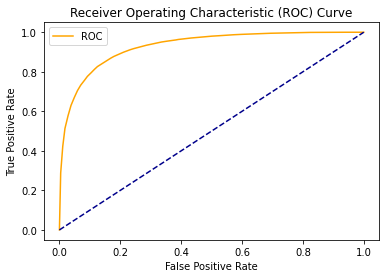

In [95]:
# Create Train & Test Data
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Running RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
result = model.fit(x_train, y_train)

from sklearn import metrics
preds_lr = model.predict(x_test)

print("Evaluation: RandomForestClassifier")
# Print the prediction accuracy
print ("            ACCURACY: ",metrics.accuracy_score(y_test, preds_lr))

# Create the Confusion matrix
print("            CONFUSION MATRIX:")
print(confusion_matrix(y_test,preds_lr))



#Defining function for Performance metric : AOC (AREA UNDER CURVE)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


probs = model.predict_proba(x_test)

#keeping only the probabilty of positive class
probs = probs[:, 1]

#Computing AUC curve
auc = roc_auc_score(y_test, probs)
print('            AUC: %.2f' % auc)

#Getting AUC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print("            ROC curve")
plot_roc_curve(fpr, tpr)


In [96]:
import joblib
joblib.dump(GCV.best_estimator_,"microcredictloanDTC.pkl")

['microcredictloanDTC.pkl']